# Определение перспективного тарифа для телеком-компании

Вы аналитик компании **«Мегалайн»** — федерального оператора сотовой связи.   

Клиентам предлагают два тарифных плана: **«Смарт» и «Ультра».** Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные **500** пользователей **«Мегалайна»:** кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за **2018** год.  

Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

### Описание тарифов


<h4>Тариф «Смарт»<a class="tocSkip"></h4>
Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.

<h4>Тариф «Ультра»<a class="tocSkip"></h4>
Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.

**Примечание:**  
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

## 1. Откроем файлы с данными и изучите общую информацию

In [69]:
import pandas as pd
import numpy as np
import math
from scipy import stats as st

In [70]:
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

In [71]:
calls.info()
calls.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [5]:
calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


In [6]:
internet.info()
internet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [7]:
internet.describe()

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


In [8]:
messages.info()
messages.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [9]:
tariffs.info()
tariffs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [10]:
users.info()
users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


## 2.  Подготовим данные

Изменим тип данных в столбцах датафреймов с датами на datatime64:

In [72]:
calls['call_date'] = pd.to_datetime(calls['call_date'] , format='%Y%m%dT')
internet['session_date'] = pd.to_datetime(internet['session_date'] , format='%Y%m%dT')
messages['message_date'] = pd.to_datetime(messages['message_date'] , format='%Y%m%dT')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y%m%dT')

Округлим значение длительности звонка в большую сторону, т.к. по условиям обоих тарифов плата взимается за 1 мин, даже если разговор длился 1 секунду: сделаем это методом  math.ceil, он округляет в большую сторону.

In [76]:
calls['duration'] = calls['duration'].apply(math.ceil)
calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000
5,1000_5,2018-11-02,0,1000
6,1000_6,2018-10-18,0,1000
7,1000_7,2018-08-22,19,1000
8,1000_8,2018-09-15,19,1000
9,1000_9,2018-08-15,0,1000


Удалим лишний столбец в датафрейме internet:

In [13]:
internet = internet.drop(['Unnamed: 0'], axis=1)
internet

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,0.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499


Посчитаем для каждого пользователя:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя (вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножим на значение из тарифного плана; прибавим абонентскую плату, соответствующую тарифному плану).

Посчитаем количество сделанных звонков и израсходованных минут разговора по месяцам:

In [14]:
data_calls = users.merge(calls, on='user_id', how='outer')


In [15]:
data_calls['month'] = data_calls['call_date'].dt.month
data_calls.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,id,call_date,duration,month
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_0,2018-07-25,0.0,7.0
1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_1,2018-08-17,0.0,8.0
2,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_2,2018-06-11,3.0,6.0
3,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_3,2018-09-21,14.0,9.0
4,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_4,2018-12-15,6.0,12.0


In [16]:
calls_per_month = data_calls.pivot_table(index=['user_id', 'month','tariff'], values='duration', aggfunc=['sum','count'])
calls_per_month

sum    count
                     duration duration
user_id month tariff                  
1000    5.0   ultra     159.0       22
        6.0   ultra     172.0       43
        7.0   ultra     340.0       47
        8.0   ultra     408.0       52
        9.0   ultra     466.0       58
...                       ...      ...
1498    10.0  smart     247.0       41
1499    9.0   smart      70.0        9
        10.0  smart     449.0       68
        11.0  smart     612.0       74
        12.0  smart     492.0       69

[3174 rows x 2 columns]

Переименуем столбец в tarrifs:

In [17]:
tariffs.rename(columns = {'tariff_name':'tariff'}, inplace = True)
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Добавим условия тарифов к звонкам:

In [18]:
final_calls = data_calls.pivot_table(index=['user_id', 'month','tariff'], values='duration', aggfunc='sum').reset_index().merge(tariffs, on='tariff', how='outer')
final_calls

,user_id,month,tariff,duration,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5.0,ultra,159.0,1000,30720,3000,1950,150,1,1
1,1000,6.0,ultra,172.0,1000,30720,3000,1950,150,1,1
2,1000,7.0,ultra,340.0,1000,30720,3000,1950,150,1,1
3,1000,8.0,ultra,408.0,1000,30720,3000,1950,150,1,1
4,1000,9.0,ultra,466.0,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...
3169,1498,10.0,smart,247.0,50,15360,500,550,200,3,3
3170,1499,9.0,smart,70.0,50,15360,500,550,200,3,3
3171,1499,10.0,smart,449.0,50,15360,500,550,200,3,3
3172,1499,11.0,smart,612.0,50,15360,500,550,200,3,3


Посчитаем перерасход минут по месяцам для каждого абонента:

In [19]:
def overlimits(row):
    minutes_included = row['minutes_included']
    duration = row['duration']
    if minutes_included >= duration:
        return 0
    if duration >= minutes_included:
        return duration - minutes_included
final_calls['over_the_limit'] = final_calls.apply(overlimits, axis=1)
final_calls

,user_id,month,tariff,duration,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,over_the_limit
0,1000,5.0,ultra,159.0,1000,30720,3000,1950,150,1,1,0.0
1,1000,6.0,ultra,172.0,1000,30720,3000,1950,150,1,1,0.0
2,1000,7.0,ultra,340.0,1000,30720,3000,1950,150,1,1,0.0
3,1000,8.0,ultra,408.0,1000,30720,3000,1950,150,1,1,0.0
4,1000,9.0,ultra,466.0,1000,30720,3000,1950,150,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3169,1498,10.0,smart,247.0,50,15360,500,550,200,3,3,0.0
3170,1499,9.0,smart,70.0,50,15360,500,550,200,3,3,0.0
3171,1499,10.0,smart,449.0,50,15360,500,550,200,3,3,0.0
3172,1499,11.0,smart,612.0,50,15360,500,550,200,3,3,112.0


Посчитаем сумму перерасхода по звонкам в зависимости от тарифа:

In [20]:
def price_calls(row):
    tariff = row['tariff']
    over_the_limit = row['over_the_limit']
    if tariff == 'ultra':
        return over_the_limit * 1
    if tariff == 'smart':
        return over_the_limit * 3
final_calls['price_calls'] = final_calls.apply(price_calls, axis=1)
final_calls

,user_id,month,tariff,duration,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,over_the_limit,price_calls
0,1000,5.0,ultra,159.0,1000,30720,3000,1950,150,1,1,0.0,0.0
1,1000,6.0,ultra,172.0,1000,30720,3000,1950,150,1,1,0.0,0.0
2,1000,7.0,ultra,340.0,1000,30720,3000,1950,150,1,1,0.0,0.0
3,1000,8.0,ultra,408.0,1000,30720,3000,1950,150,1,1,0.0,0.0
4,1000,9.0,ultra,466.0,1000,30720,3000,1950,150,1,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3169,1498,10.0,smart,247.0,50,15360,500,550,200,3,3,0.0,0.0
3170,1499,9.0,smart,70.0,50,15360,500,550,200,3,3,0.0,0.0
3171,1499,10.0,smart,449.0,50,15360,500,550,200,3,3,0.0,0.0
3172,1499,11.0,smart,612.0,50,15360,500,550,200,3,3,112.0,336.0


Посчитаем количество отправленных сообщений по месяцам:

In [21]:
data_messages = users.merge(messages, on='user_id', how='outer')
data_messages.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,id,message_date
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_0,2018-06-27
1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_1,2018-10-08
2,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_2,2018-08-04
3,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_3,2018-06-16
4,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_4,2018-12-05


In [22]:
data_messages['month'] = data_messages['message_date'].dt.month
data_messages.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,id,message_date,month
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_0,2018-06-27,6.0
1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_1,2018-10-08,10.0
2,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_2,2018-08-04,8.0
3,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_3,2018-06-16,6.0
4,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_4,2018-12-05,12.0


In [23]:
messages_per_mounth = data_messages.pivot_table(index=['user_id', 'month','tariff'], values='message_date', aggfunc='count')
messages_per_mounth

message_date
user_id month tariff              
1000    5.0   ultra             22
        6.0   ultra             60
        7.0   ultra             75
        8.0   ultra             81
        9.0   ultra             57
...                            ...
1498    10.0  smart             42
1499    9.0   smart             11
        10.0  smart             48
        11.0  smart             59
        12.0  smart             66

[2717 rows x 1 columns]

Добавим условия тарифов к сообщениям:

In [24]:
final_messages = data_messages.pivot_table(index=['user_id', 'month','tariff'], values='message_date', aggfunc='count').reset_index().merge(tariffs, on='tariff', how='outer')
final_messages

,user_id,month,tariff,message_date,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5.0,ultra,22,1000,30720,3000,1950,150,1,1
1,1000,6.0,ultra,60,1000,30720,3000,1950,150,1,1
2,1000,7.0,ultra,75,1000,30720,3000,1950,150,1,1
3,1000,8.0,ultra,81,1000,30720,3000,1950,150,1,1
4,1000,9.0,ultra,57,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2712,1498,10.0,smart,42,50,15360,500,550,200,3,3
2713,1499,9.0,smart,11,50,15360,500,550,200,3,3
2714,1499,10.0,smart,48,50,15360,500,550,200,3,3
2715,1499,11.0,smart,59,50,15360,500,550,200,3,3


Посчитаем перерасход сообщений по месяцам для каждого абонента:

In [25]:
def overlimits_messages(row):
    messages_included = row['messages_included']
    message_count = row['message_date']
    if messages_included >= message_count:
        return 0
    if messages_included <= message_count:
        return message_count - messages_included
final_messages['over_the_limit'] = final_messages.apply(overlimits_messages, axis=1)
final_messages

,user_id,month,tariff,message_date,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,over_the_limit
0,1000,5.0,ultra,22,1000,30720,3000,1950,150,1,1,0
1,1000,6.0,ultra,60,1000,30720,3000,1950,150,1,1,0
2,1000,7.0,ultra,75,1000,30720,3000,1950,150,1,1,0
3,1000,8.0,ultra,81,1000,30720,3000,1950,150,1,1,0
4,1000,9.0,ultra,57,1000,30720,3000,1950,150,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2712,1498,10.0,smart,42,50,15360,500,550,200,3,3,0
2713,1499,9.0,smart,11,50,15360,500,550,200,3,3,0
2714,1499,10.0,smart,48,50,15360,500,550,200,3,3,0
2715,1499,11.0,smart,59,50,15360,500,550,200,3,3,9


Посчитаем сумму перерасхода по сообщениям для каждого абнонета:

In [26]:
def price_messages(row):
    tariff = row['tariff']
    over_the_limit = row['over_the_limit']
    if tariff == 'ultra':
        return over_the_limit * 1
    if tariff == 'smart':
        return over_the_limit * 3
final_messages['price_messages'] = final_messages.apply(price_messages, axis=1)
final_messages

,user_id,month,tariff,message_date,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,over_the_limit,price_messages
0,1000,5.0,ultra,22,1000,30720,3000,1950,150,1,1,0,0
1,1000,6.0,ultra,60,1000,30720,3000,1950,150,1,1,0,0
2,1000,7.0,ultra,75,1000,30720,3000,1950,150,1,1,0,0
3,1000,8.0,ultra,81,1000,30720,3000,1950,150,1,1,0,0
4,1000,9.0,ultra,57,1000,30720,3000,1950,150,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2712,1498,10.0,smart,42,50,15360,500,550,200,3,3,0,0
2713,1499,9.0,smart,11,50,15360,500,550,200,3,3,0,0
2714,1499,10.0,smart,48,50,15360,500,550,200,3,3,0,0
2715,1499,11.0,smart,59,50,15360,500,550,200,3,3,9,27


Посчитаем объем израсходованного интернет-трафика по месяцам:

In [27]:
data_internet = users.merge(internet, on='user_id', how='outer')
data_internet.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,id,mb_used,session_date
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_0,112.95,2018-11-25
1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_1,1052.81,2018-09-07
2,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_2,1197.26,2018-06-25
3,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_3,550.27,2018-08-22
4,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_4,302.56,2018-09-24


In [28]:
data_internet['month'] = data_internet['session_date'].dt.month
data_internet.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,id,mb_used,session_date,month
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_0,112.95,2018-11-25,11.0
1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_1,1052.81,2018-09-07,9.0
2,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_2,1197.26,2018-06-25,6.0
3,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_3,550.27,2018-08-22,8.0
4,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_4,302.56,2018-09-24,9.0


Сгруппируем затраты на интернет пользователями по месяцам:

In [29]:
internet_per_month = data_internet.pivot_table(index=['user_id', 'month','tariff'], values='mb_used', aggfunc='sum')
internet_per_month

mb_used
user_id month tariff          
1000    5.0   ultra    2253.49
        6.0   ultra   23233.77
        7.0   ultra   14003.64
        8.0   ultra   14055.93
        9.0   ultra   14568.91
...                        ...
1498    10.0  smart   20579.36
1499    9.0   smart    1845.75
        10.0  smart   17788.51
        11.0  smart   17963.31
        12.0  smart   13055.58

[3203 rows x 1 columns]

Добавим условия тарифов в final_inet:

In [30]:
final_inet = internet_per_month.reset_index().merge(tariffs, on='tariff', how='outer')
final_inet

,user_id,month,tariff,mb_used,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5.0,ultra,2253.49,1000,30720,3000,1950,150,1,1
1,1000,6.0,ultra,23233.77,1000,30720,3000,1950,150,1,1
2,1000,7.0,ultra,14003.64,1000,30720,3000,1950,150,1,1
3,1000,8.0,ultra,14055.93,1000,30720,3000,1950,150,1,1
4,1000,9.0,ultra,14568.91,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...
3198,1498,10.0,smart,20579.36,50,15360,500,550,200,3,3
3199,1499,9.0,smart,1845.75,50,15360,500,550,200,3,3
3200,1499,10.0,smart,17788.51,50,15360,500,550,200,3,3
3201,1499,11.0,smart,17963.31,50,15360,500,550,200,3,3


Посчитаем перерасход трафика по месяцам для каждого абонента:

In [31]:
def prc(row):
    mbpm = row['mb_per_month_included']
    mbused = row['mb_used']
    if mbpm >= mbused:
        return 0
    if mbpm <= mbused:
        return (mbused - mbpm) / 1024
final_inet['over_the_limit'] = final_inet.apply(prc, axis=1)
final_inet

,user_id,month,tariff,mb_used,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,over_the_limit
0,1000,5.0,ultra,2253.49,1000,30720,3000,1950,150,1,1,0.000000
1,1000,6.0,ultra,23233.77,1000,30720,3000,1950,150,1,1,0.000000
2,1000,7.0,ultra,14003.64,1000,30720,3000,1950,150,1,1,0.000000
3,1000,8.0,ultra,14055.93,1000,30720,3000,1950,150,1,1,0.000000
4,1000,9.0,ultra,14568.91,1000,30720,3000,1950,150,1,1,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
3198,1498,10.0,smart,20579.36,50,15360,500,550,200,3,3,5.097031
3199,1499,9.0,smart,1845.75,50,15360,500,550,200,3,3,0.000000
3200,1499,10.0,smart,17788.51,50,15360,500,550,200,3,3,2.371592
3201,1499,11.0,smart,17963.31,50,15360,500,550,200,3,3,2.542295


Округлим перерасход в гигабайтах в большую сторону, по условию тарифных планов:

In [32]:
final_inet['over_the_limit'] = final_inet['over_the_limit'].apply(math.ceil)
final_inet

,user_id,month,tariff,mb_used,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,over_the_limit
0,1000,5.0,ultra,2253.49,1000,30720,3000,1950,150,1,1,0
1,1000,6.0,ultra,23233.77,1000,30720,3000,1950,150,1,1,0
2,1000,7.0,ultra,14003.64,1000,30720,3000,1950,150,1,1,0
3,1000,8.0,ultra,14055.93,1000,30720,3000,1950,150,1,1,0
4,1000,9.0,ultra,14568.91,1000,30720,3000,1950,150,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3198,1498,10.0,smart,20579.36,50,15360,500,550,200,3,3,6
3199,1499,9.0,smart,1845.75,50,15360,500,550,200,3,3,0
3200,1499,10.0,smart,17788.51,50,15360,500,550,200,3,3,3
3201,1499,11.0,smart,17963.31,50,15360,500,550,200,3,3,3


Посчитаем затраты на интернет:

In [33]:
def price_internet(row):
    tariff = row['tariff']
    over_the_limit = row['over_the_limit']
    if tariff == 'ultra':
        return over_the_limit * 150
    if tariff == 'smart':
        return over_the_limit * 200
final_inet['price_inet'] = final_inet.apply(price_internet, axis=1)

In [34]:
final_inet

,user_id,month,tariff,mb_used,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,over_the_limit,price_inet
0,1000,5.0,ultra,2253.49,1000,30720,3000,1950,150,1,1,0,0
1,1000,6.0,ultra,23233.77,1000,30720,3000,1950,150,1,1,0,0
2,1000,7.0,ultra,14003.64,1000,30720,3000,1950,150,1,1,0,0
3,1000,8.0,ultra,14055.93,1000,30720,3000,1950,150,1,1,0,0
4,1000,9.0,ultra,14568.91,1000,30720,3000,1950,150,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3198,1498,10.0,smart,20579.36,50,15360,500,550,200,3,3,6,1200
3199,1499,9.0,smart,1845.75,50,15360,500,550,200,3,3,0,0
3200,1499,10.0,smart,17788.51,50,15360,500,550,200,3,3,3,600
3201,1499,11.0,smart,17963.31,50,15360,500,550,200,3,3,3,600


Объединим расходы по всем статьям в одну таблицу и посчитаем итоговые затраты по месяцам по каждому абоненту:

In [35]:
pretotal = final_inet[['user_id','month', 'tariff', 'rub_monthly_fee', 'price_inet']].merge(final_messages[['user_id', 'month','price_messages']], on=['user_id', 'month'], how='outer')
pretotal[pretotal['user_id'] ==1481]

,user_id,month,tariff,rub_monthly_fee,price_inet,price_messages
3108,1481,2.0,smart,550.0,0.0,0.0
3109,1481,3.0,smart,550.0,600.0,0.0
3110,1481,4.0,smart,550.0,1000.0,0.0
3111,1481,5.0,smart,550.0,600.0,0.0
3112,1481,6.0,smart,550.0,0.0,0.0
3113,1481,7.0,smart,550.0,800.0,0.0
3114,1481,8.0,smart,550.0,1200.0,0.0
3115,1481,9.0,smart,550.0,400.0,0.0
3116,1481,10.0,smart,550.0,600.0,0.0
3117,1481,11.0,smart,550.0,1000.0,0.0


In [36]:
total = pretotal.merge(final_calls[['user_id','month', 'tariff', 'rub_monthly_fee','price_calls']], on=['user_id', 'month'], how='outer')
total

,user_id,month,tariff_x,rub_monthly_fee_x,price_inet,price_messages,tariff_y,rub_monthly_fee_y,price_calls
0,1000,5.0,ultra,1950.0,0.0,0.0,ultra,1950.0,0.0
1,1000,6.0,ultra,1950.0,0.0,0.0,ultra,1950.0,0.0
2,1000,7.0,ultra,1950.0,0.0,0.0,ultra,1950.0,0.0
3,1000,8.0,ultra,1950.0,0.0,0.0,ultra,1950.0,0.0
4,1000,9.0,ultra,1950.0,0.0,0.0,ultra,1950.0,0.0
...,...,...,...,...,...,...,...,...,...
3209,1273,11.0,NaN,NaN,NaN,0.0,ultra,1950.0,0.0
3210,1273,12.0,NaN,NaN,NaN,0.0,ultra,1950.0,0.0
3211,1377,2.0,NaN,NaN,NaN,0.0,ultra,1950.0,0.0
3212,1392,2.0,NaN,NaN,NaN,0.0,ultra,1950.0,0.0


In [37]:
total.user_id.nunique()

498

In [38]:
total = total.fillna(0)
total.loc[total['tariff_x'] == 0, 'tariff_x'] = total['tariff_y']
total.loc[total['rub_monthly_fee_x'] == 0, 'rub_monthly_fee_x'] = total['rub_monthly_fee_y']
total.drop(columns=['tariff_y', 'rub_monthly_fee_y'])
total

,user_id,month,tariff_x,rub_monthly_fee_x,price_inet,price_messages,tariff_y,rub_monthly_fee_y,price_calls
0,1000,5.0,ultra,1950.0,0.0,0.0,ultra,1950.0,0.0
1,1000,6.0,ultra,1950.0,0.0,0.0,ultra,1950.0,0.0
2,1000,7.0,ultra,1950.0,0.0,0.0,ultra,1950.0,0.0
3,1000,8.0,ultra,1950.0,0.0,0.0,ultra,1950.0,0.0
4,1000,9.0,ultra,1950.0,0.0,0.0,ultra,1950.0,0.0
...,...,...,...,...,...,...,...,...,...
3209,1273,11.0,ultra,1950.0,0.0,0.0,ultra,1950.0,0.0
3210,1273,12.0,ultra,1950.0,0.0,0.0,ultra,1950.0,0.0
3211,1377,2.0,ultra,1950.0,0.0,0.0,ultra,1950.0,0.0
3212,1392,2.0,ultra,1950.0,0.0,0.0,ultra,1950.0,0.0


In [39]:
total = total[['user_id','month','tariff_x','rub_monthly_fee_x','price_inet','price_messages','price_calls']]
total

,user_id,month,tariff_x,rub_monthly_fee_x,price_inet,price_messages,price_calls
0,1000,5.0,ultra,1950.0,0.0,0.0,0.0
1,1000,6.0,ultra,1950.0,0.0,0.0,0.0
2,1000,7.0,ultra,1950.0,0.0,0.0,0.0
3,1000,8.0,ultra,1950.0,0.0,0.0,0.0
4,1000,9.0,ultra,1950.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
3209,1273,11.0,ultra,1950.0,0.0,0.0,0.0
3210,1273,12.0,ultra,1950.0,0.0,0.0,0.0
3211,1377,2.0,ultra,1950.0,0.0,0.0,0.0
3212,1392,2.0,ultra,1950.0,0.0,0.0,0.0


Заменили недостающие данные по названию тарифа и месячной стоимости, которые возникли при объединении датафреймов.

Теперь посчитаем затраты каждого клиента в месяц, с учетом абнонентской платы и платы за услуги сверх лимита по условиям тарифа, если таковые имеются:

In [40]:
total['final_price'] = total['rub_monthly_fee_x'] + total['price_inet'] + total['price_messages'] + total['price_calls']
total

/tmp/ipykernel_36/2194486047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total['final_price'] = total['rub_monthly_fee_x'] + total['price_inet'] + total['price_messages'] + total['price_calls']


,user_id,month,tariff_x,rub_monthly_fee_x,price_inet,price_messages,price_calls,final_price
0,1000,5.0,ultra,1950.0,0.0,0.0,0.0,1950.0
1,1000,6.0,ultra,1950.0,0.0,0.0,0.0,1950.0
2,1000,7.0,ultra,1950.0,0.0,0.0,0.0,1950.0
3,1000,8.0,ultra,1950.0,0.0,0.0,0.0,1950.0
4,1000,9.0,ultra,1950.0,0.0,0.0,0.0,1950.0
...,...,...,...,...,...,...,...,...
3209,1273,11.0,ultra,1950.0,0.0,0.0,0.0,1950.0
3210,1273,12.0,ultra,1950.0,0.0,0.0,0.0,1950.0
3211,1377,2.0,ultra,1950.0,0.0,0.0,0.0,1950.0
3212,1392,2.0,ultra,1950.0,0.0,0.0,0.0,1950.0


In [41]:
total_p = total.pivot_table(index='tariff_x', values=['final_price'], aggfunc=['sum', 'count', 'mean']).reset_index()
total_p.columns=['tariff','final_price_sum','count', 'mean']
total_p

,tariff,final_price_sum,count,mean
0,smart,2875351.0,2229,1289.973531
1,ultra,2039100.0,985,2070.152284


Тариф **smart** приносит больше дохода, количество пользователей в 2 раза выше, но средний чек ниже, чем у тарифа **ultra**

## 3. Проанализируем данные

Опишем поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. Посчитаем среднее количество, дисперсию и стандартное отклонение. Построим гистограммы. Опишим распределения

Проанализируем базу со **звонками:**

In [42]:
final_calls.pivot_table(index='tariff', values='duration', aggfunc='mean').reset_index()

,tariff,duration
0,smart,419.062978
1,ultra,545.451104


В среднем пользователи тарифа **smart** говорят 419 минут в месяц, а пользователи тарифа **ultra** 545 минут в месяц.

Посчитаем дисперсию значений столбца **duration** для тарифа **smart**:

In [43]:
variance_calls_smart = np.var(final_calls[final_calls['tariff'] =='smart']['duration'])
variance_calls_smart

35828.06530953033

Посчитаем дисперсию значений столбца **duration** для тарифа **ultra**:

In [44]:
variance_calls_ultra = np.var(final_calls[final_calls['tariff'] =='ultra']['duration'])
variance_calls_ultra

94104.36117385984

У тарифа **ultra** дисперсия выше почти в 3 раза!

Посчитаем стандартное отклонение:

In [45]:
standard_deviation_calls_smart = np.std(final_calls[final_calls['tariff'] =='smart']['duration'])
standard_deviation_calls_smart

189.2830296395594

In [46]:
standard_deviation_calls_ultra = np.sqrt(variance_calls_ultra)
standard_deviation_calls_ultra

306.76434143143143

Ожидаемо, стандартное отклонение выше у тарифа **ultra**

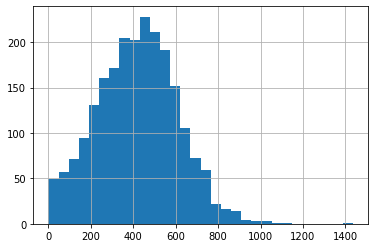

In [47]:
final_calls[final_calls['tariff'] =='smart']['duration'].hist(bins=30);

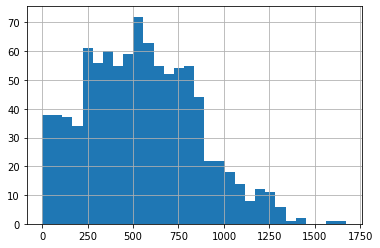

In [48]:
final_calls[final_calls['tariff'] =='ultra']['duration'].hist(bins=30);

Гистограмма наглядно показывает симметричное распределение у обоих тарифов.

Проанализруем базу с **сообщениями:**

In [49]:
final_messages.pivot_table(index='tariff', values='message_date', aggfunc='sum').reset_index()

,tariff,message_date
0,smart,74413
1,ultra,48623


На тарифе **smart** люди явно чаще пользуются отправкой сообщений.

Посчитаем дисперсию значений для столбца **message_date** тарифа **smart:**

In [50]:
variance_messages_smart = np.var(final_messages[final_messages['tariff'] =='smart']['message_date'])
variance_messages_smart

717.220843110227

Посчитаем дисперсию значений для столбца **message_date** тарифа **ultra:**

In [51]:
variance_messages_ultra = np.var(final_messages[final_messages['tariff'] =='ultra']['message_date'])
variance_messages_ultra

2107.0055235156838

Посчитаем стандартное отклонение:

In [52]:
standard_deviation_messages_smart = np.std(final_messages[final_messages['tariff'] =='smart']['message_date'])
standard_deviation_messages_smart

26.780979129042816

In [53]:
standard_deviation_messages_ultra = np.std(final_messages[final_messages['tariff'] =='ultra']['message_date'])
standard_deviation_messages_ultra

45.90212983637779

И дисперсия и стандартное отклонение выше у тарифа **ultra.**

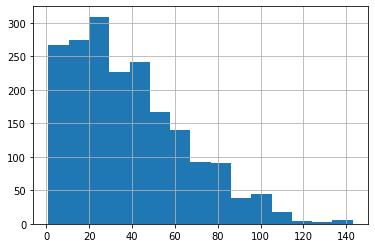

In [54]:
final_messages[final_messages['tariff'] =='smart']['message_date'].hist(bins=15);

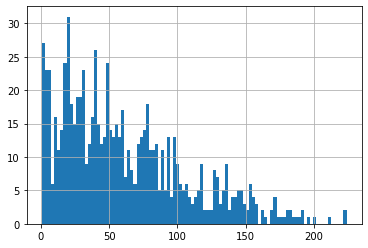

In [55]:
final_messages[final_messages['tariff'] =='ultra']['message_date'].hist(bins=100);

Здесь мы видим, что датасет по столбцу с сообщениями скошен влево в обоих тарифах

Проанализруем базу с **интернет трафиком:**

In [56]:
it = final_inet.pivot_table(index='tariff', values='mb_used', aggfunc='sum').reset_index()

In [57]:
it['mb_used'] = it['mb_used'] / 1024 

In [58]:
it.columns = ['tariff', 'gb_used']
it

,tariff,gb_used
0,smart,35281.733008
1,ultra,18727.317510


На тарифе **smart** пользователи почти в 2 раза больше потребляют интернет трафика, чем на тарифе **ultra**

Посчитаем дисперсию значений для столбцов **mb_used** для обоих тарифов:

In [59]:
variance_inet_smart = np.var(final_inet[final_inet['tariff'] =='smart']['mb_used'])
variance_inet_smart

34344529.80091768

In [60]:
variance_inet_ultra = np.var(final_inet[final_inet['tariff'] =='ultra']['mb_used'])
variance_inet_ultra

98762849.72293653

Посчитаем стандартное отклонение:

In [61]:
standard_deviation_inet_smart = np.std(final_inet[final_inet['tariff'] =='smart']['mb_used'])
standard_deviation_inet_smart

5860.420616382213

In [62]:
standard_deviation_inet_ultra = np.std(final_inet[final_inet['tariff'] =='ultra']['mb_used'])
standard_deviation_inet_ultra

9937.949975872112

Дисперсия и стандартное отклонение выше у тарифа **ultra**

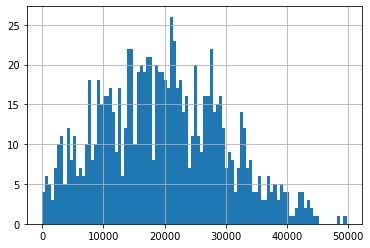

In [63]:
final_inet[final_inet['tariff'] =='ultra']['mb_used'].hist(bins=100);

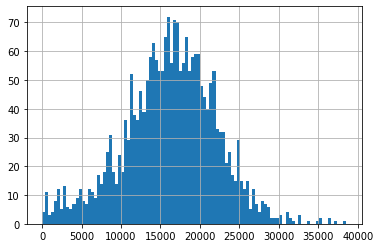

In [64]:
final_inet[final_inet['tariff'] =='smart']['mb_used'].hist(bins=100);

Гистограмма расхода трафика показывает нам симметричное распределение у обоих тарифов.

##  4. Проверим гипотезы

1. Средняя выручка пользователей тарифов **«Ультра» и «Смарт»** различаются.   
2. Средняя выручка пользователи из **Москвы** отличается от выручки пользователей из других регионов.    

Пороговое значение **alpha** зададим **0.05**

Сформируем **нулевую** и **альтернативную** гипотезу для каждого задания:
1. **Нулевая** гипотеза гласит - средняя выручка пользователей тарифов тарифов **ultra** и **smart** не различаются.  
   **Альтернативная** гипотеза - различаются.
2. **Нулевая** гипотеза гласит - средняя выручка пользователей из Москвы одинакова с выручкой пользователей из других регионов. **Альтернативная** гипотеза - различаются.

Различается ли выручка спользователей разных тарифов:

In [65]:
ultra = total[total['tariff_x'] =='ultra']['final_price']
smart = total[total['tariff_x'] =='smart']['final_price']
alpha = 0.05
results = st.ttest_ind(ultra, smart, equal_var = False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  4.2606313931076085e-250
Отвергаем нулевую гипотезу


Как мы видим средняя выручка пользователей тарифов «Ультра» и «Смарт»  действительно различаются, отвергаем нулевую гипотезу о равенстве.

Различается ли выручка в зависимости от города:

In [66]:
city_group = total.merge(users[['user_id','city']], on='user_id')
city_group

,user_id,month,tariff_x,rub_monthly_fee_x,price_inet,price_messages,price_calls,final_price,city
0,1000,5.0,ultra,1950.0,0.0,0.0,0.0,1950.0,Краснодар
1,1000,6.0,ultra,1950.0,0.0,0.0,0.0,1950.0,Краснодар
2,1000,7.0,ultra,1950.0,0.0,0.0,0.0,1950.0,Краснодар
3,1000,8.0,ultra,1950.0,0.0,0.0,0.0,1950.0,Краснодар
4,1000,9.0,ultra,1950.0,0.0,0.0,0.0,1950.0,Краснодар
...,...,...,...,...,...,...,...,...,...
3209,1273,8.0,ultra,1950.0,0.0,0.0,0.0,1950.0,Курган
3210,1273,9.0,ultra,1950.0,0.0,0.0,0.0,1950.0,Курган
3211,1273,10.0,ultra,1950.0,0.0,0.0,0.0,1950.0,Курган
3212,1273,11.0,ultra,1950.0,0.0,0.0,0.0,1950.0,Курган


In [67]:
moscow = city_group[city_group['city'] =='Москва']['final_price']
another = city_group[city_group['city'] !='Москва']['final_price']
alpha = 0.05
results = st.ttest_ind(moscow, another, equal_var = False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.5257376663729298
Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза о равенстве средних подтверждена, Москва или периферия - разницы нет.

## 5. Общий вывод

In [68]:
total_p = total_p.style.hide_index()
total_p

tariff,final_price_sum,count,mean
smart,2875351.000000,2229,1289.973531
ultra,2039100.000000,985,2070.152284


Тариф **smart** приносит больше прибыли, в основном за счет большего количества пользователей (больше, чем у **ultra** более чем в 2 раза), так же пользователи тарифа **smart** переплачивают(1290-550=740р) больше сверх стоимости тарифа.
Пользователи тарифа **smart** много пользуются интернетом и отправляют больше сообщений, чем пользователи **ultra**.
Абоненты **ultra** в основном много говорят, реже пользуются остальными услугами и зачастую не выходят за рамки ежемесячной стоимости тарифа в 1950 рублей.